In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hanoverian', 'Przewalski', 'Thoroughbred', 'Jeju', 'Curly', 'Fresian', 'Debao', 'Criollo', 'Mongolian', 'American Quarter', 'Arabian', 'Akhal-Teke'
sizes = [5, 5, 10, 5, 5, 20, 10, 5, 5, 5, 10, 10]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Species Distribution")
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'European', 'Mongolian', 'Korean', 'North American', 'Chinese', 'South American','Middle Eastern'

sizes = [3, 2, 1, 2, 1, 1, 2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Geographic Distribution")
plt.show()

In [184]:
df_feral = pd.read_csv('horse/annotated_tes/thorough_te.txt', sep='\t', lineterminator='\n')
df_feral.columns = ['chrom','start','end','subfam','fam']
#print(df_feral.head())
df_thor = pd.read_csv('horse/annotated_tes/przewalksi_te.txt', sep='\t', lineterminator='\n')
df_thor.columns = ['chrom','start','end','subfam','fam']

In [185]:
x_f = df_feral['subfam'].value_counts()
y_f = df_feral['subfam'].value_counts()

In [186]:
target = "subfam"
print(df_feral[target].unique())
keys_f = df_feral[target].unique()
keys_t = df_thor[target].unique()
keys = list(keys_f) + list(keys_t)

['L1ME2' 'HAL1M8' 'LTR86B1' 'MLT1J' 'L1MB8' 'L1MC1' 'MLT1C2' 'L1M5'
 'X7B_LINE' 'L1MA9' 'MLT1L' 'L1MEd' 'L1ME4b' 'Tigger13a' 'Charlie18a'
 'MLT1B' 'Kanga1a' 'L1MC5a' 'L2c' 'L1MC2' 'EuthAT-2' 'L1MB4' 'MIRb' 'MER3'
 'L2d2' 'Tigger15a' 'L2a' 'L1MEf' 'L1MB7' 'L1MB3' 'L1MC3' 'MLT1G1' 'MLT1K'
 'L1ME3Cz' 'MIR3' 'L1MEj' 'Charlie24' 'Tigger6a' 'MER34C_v' 'L1ME3B'
 'MLT1D' 'LTR16C' 'MLT1G3' 'L2' 'MER113' 'L1MC' 'MER101-int' 'L1M7'
 'L1MC5' 'Charlie1b' 'L1MC4' 'L1MB2' 'L1M4' 'MLT1J-int' 'tRNA-Glu-GAG_v'
 'MER96B' 'L1ME3A' 'Charlie2a' 'L1MEi' 'L1MEb' 'MLT1A0' 'L1MEc' 'MLT1F1'
 'MER105' 'MIR' 'L3' 'LTR50' 'MER106B' 'L2b' 'MER58A' 'Charlie2b' 'L1MB1'
 'L1ME3G' 'MER2' 'L1M3c' 'L1MD' 'Charlie7' 'MER112' 'L1M3' 'MER20'
 'Charlie16' 'L1ME1' 'LTR79' 'L1ME4c' 'L1ME4a' 'HAL1' 'Looper'
 'ERV3-16A3_LTR' 'Kanga2_a' 'MER5A' 'L1MCa' 'L1MB5' 'Charlie6'
 'ERV3-16A3_I' 'L1MCb' 'UCON58' 'MER65D' 'L1ME3D' 'L1MD2' 'L1MDa' 'MER67D'
 'L1MD3' 'MER103C' 'Arthur2' 'MLT1E3' 'LTR31' 'Charlie9' 'L4_A_Mam' 'L1P1'
 'LTR106_Mam

In [187]:
f_counts = {f:0 for f in keys}
t_counts = {f:0 for f in keys}
for i,row in df_feral.iterrows():
    f_counts[row[target]] += 1
for i,row in df_thor.iterrows():
    t_counts[row[target]] += 1

In [188]:
if target == 'fam':
    del t_counts['LINE/L1']
    del f_counts['LINE/L1']

In [189]:
df_f = pd.DataFrame(f_counts.items(), columns = ['fam', 'count'])
fam_types = []
for i,row in df_f.iterrows():
    if 'DNA' in row['fam']:
        fam_types.append('DNA')
    elif 'LTR' in row['fam']:
        fam_types.append('LTR')
    elif 'LINE' in row['fam']:
        fam_types.append('LINE')
    elif 'SINE' in row['fam']:
        fam_types.append('SINE')
    elif 'Unknown' in row['fam']:
        fam_types.append('UNK')
    elif 'Satellite' in row['fam']:
        fam_types.append('UNK')
    elif 'tRNA' in row['fam']:
        fam_types.append('tRNA')
    else:
        print(row)
        break
df_f['type'] = fam_types
df_f.sort_values(by='type', inplace=True)


df_t = pd.DataFrame(t_counts.items(), columns = ['fam', 'count'])
fam_types = []
for i,row in df_t.iterrows():
    if 'DNA' in row['fam']:
        fam_types.append('DNA')
    elif 'LTR' in row['fam']:
        fam_types.append('LTR')
    elif 'LINE' in row['fam']:
        fam_types.append('LINE')
    elif 'SINE' in row['fam']:
        fam_types.append('SINE')
    elif 'Unknown' in row['fam']:
        fam_types.append('UNK')
    elif 'Satellite' in row['fam']:
        fam_types.append('UNK')
    elif 'tRNA' in row['fam']:
        fam_types.append('tRNA')
    else:
        print(row)
        break
df_t['type'] = fam_types
df_t.sort_values(by='type', inplace=True)

fam      L1ME2
count        3
Name: 0, dtype: object


ValueError: Length of values (0) does not match length of index (189)

NameError: name 'df_t' is not defined

<Figure size 640x480 with 0 Axes>

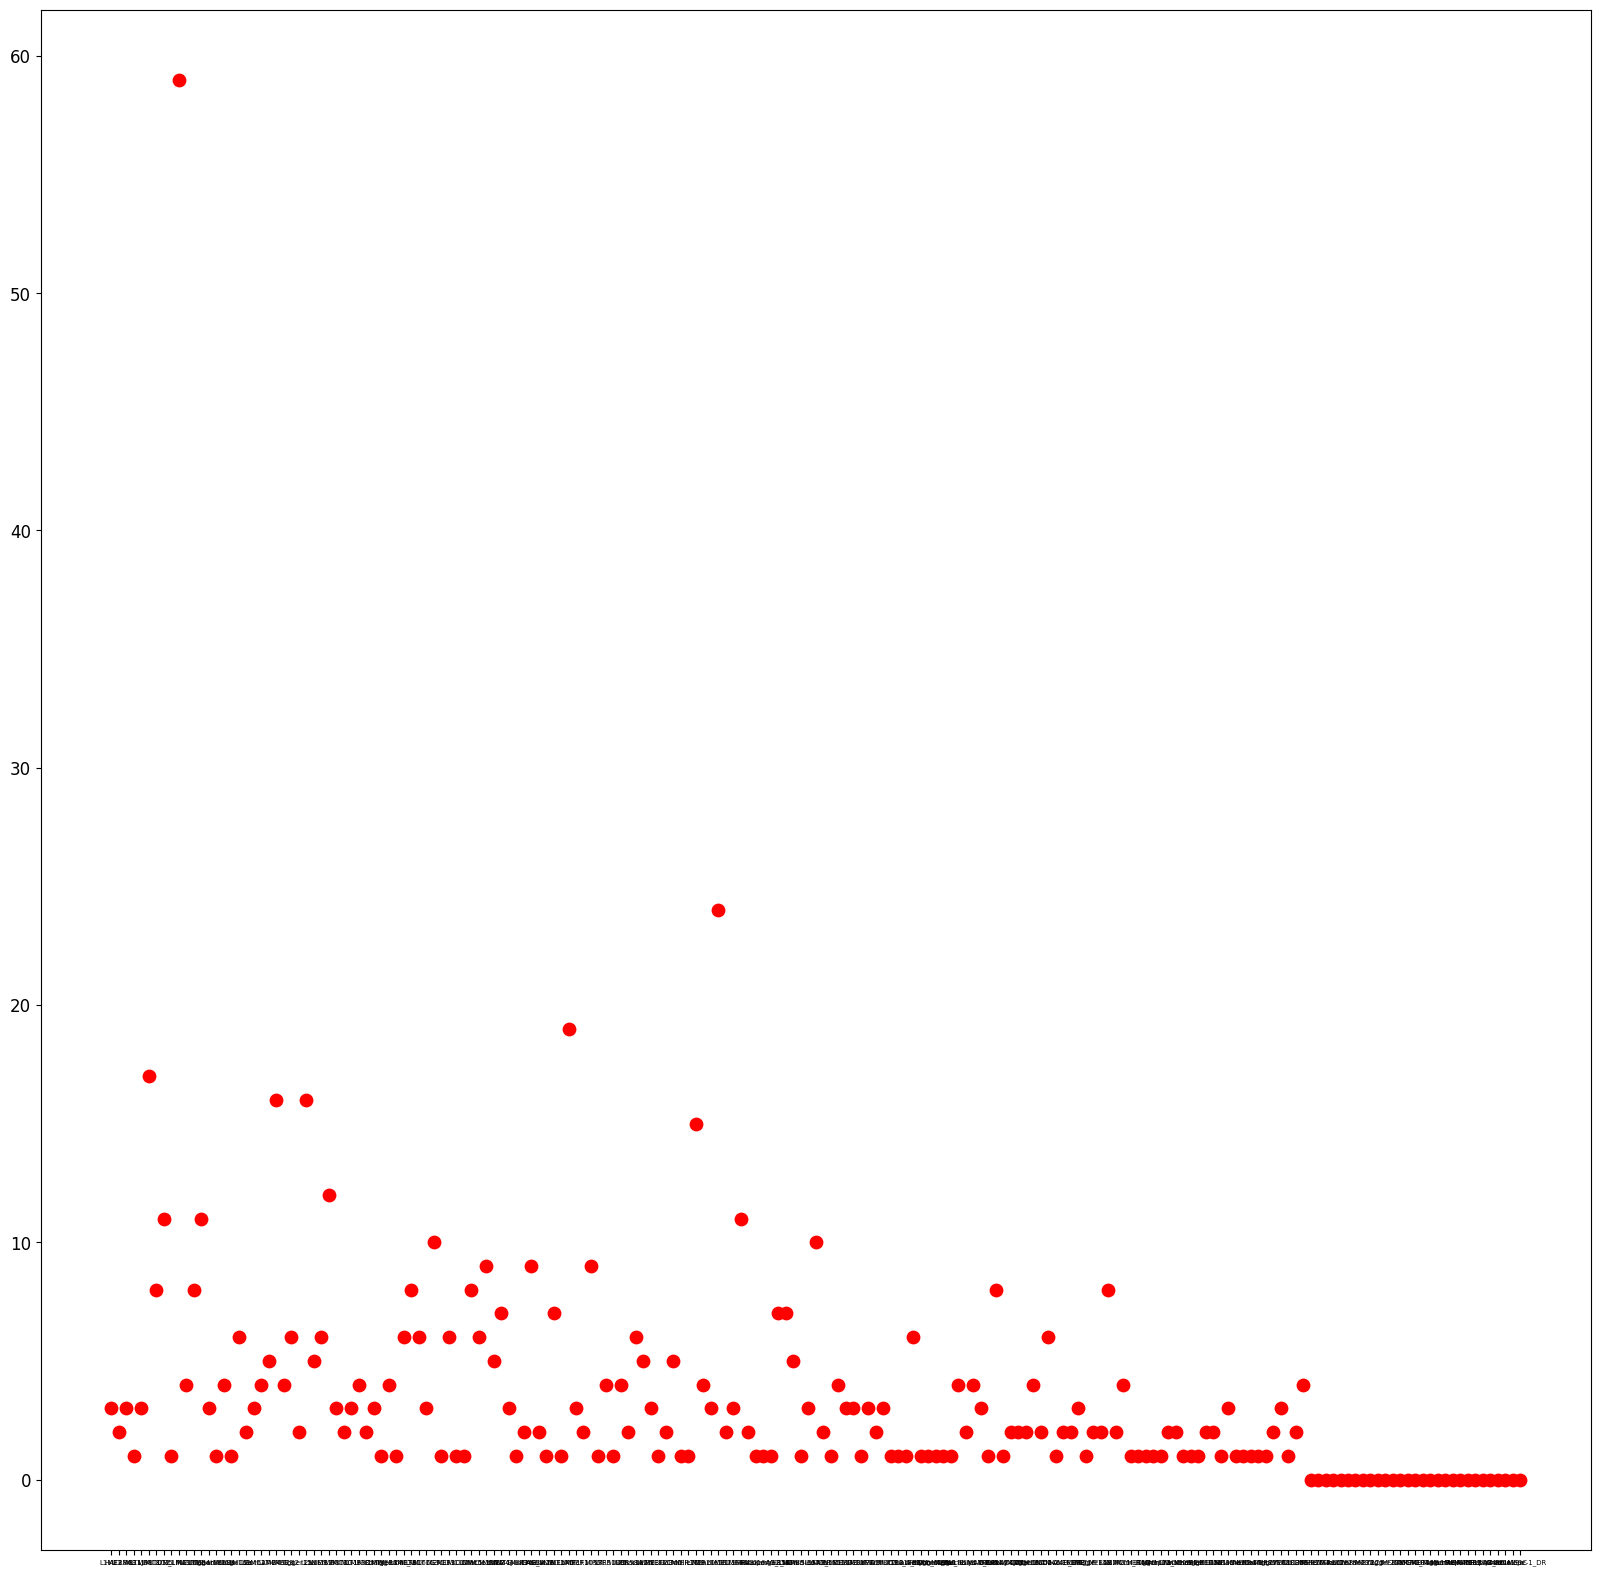

In [190]:
from matplotlib.pyplot import figure



fig = plt.figure()
figure(figsize=(20,20), dpi=100)


#plt.scatter(t_counts.keys(), f_counts.values(), s=80, color='r', label = 'Przewalski')
plt.scatter(df_f['fam'], df_f['count'], s=80, color='r', label = 'Przewalski')
plt.scatter(df_f['fam'], df_t['count'], s=80, color='b', label = 'Thoroughbred')

plt.grid(axis = 'y', alpha = 0.2)
plt.grid(axis = 'x', alpha = 0.2)
plt.legend()


left, bottom, width, height = (-0.5, -0.1, 10.0, 75)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="tomato")
plt.gca().add_patch(rect)
plt.text(-0.4, 74,'DNA',fontsize=16, color="tomato")

left, bottom, width, height = (9.5, -0.1, 3, 75)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="turquoise")
plt.gca().add_patch(rect)
plt.text(9.5, 74,'LINE',fontsize=16, color="turquoise")

left, bottom, width, height = (12.5, -0.1, 5, 75)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="green")
plt.gca().add_patch(rect)
plt.text(12.5, 74,'LTR',fontsize=16, color="green")

left, bottom, width, height = (17.5, -0.1, 1, 75)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="orange")
plt.gca().add_patch(rect)
plt.text(17.5, 74,'SINE',fontsize=16, color="orange")


left, bottom, width, height = (18.5, -0.1, 1, 75)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="purple")
plt.gca().add_patch(rect)
plt.text(18.5, 74,'UNK',fontsize=16, color="purple")




plt.title("Arabian vs Akhal Teke TE Family")
plt.xticks(rotation = 65)
#plt.savefig('horse/results/.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

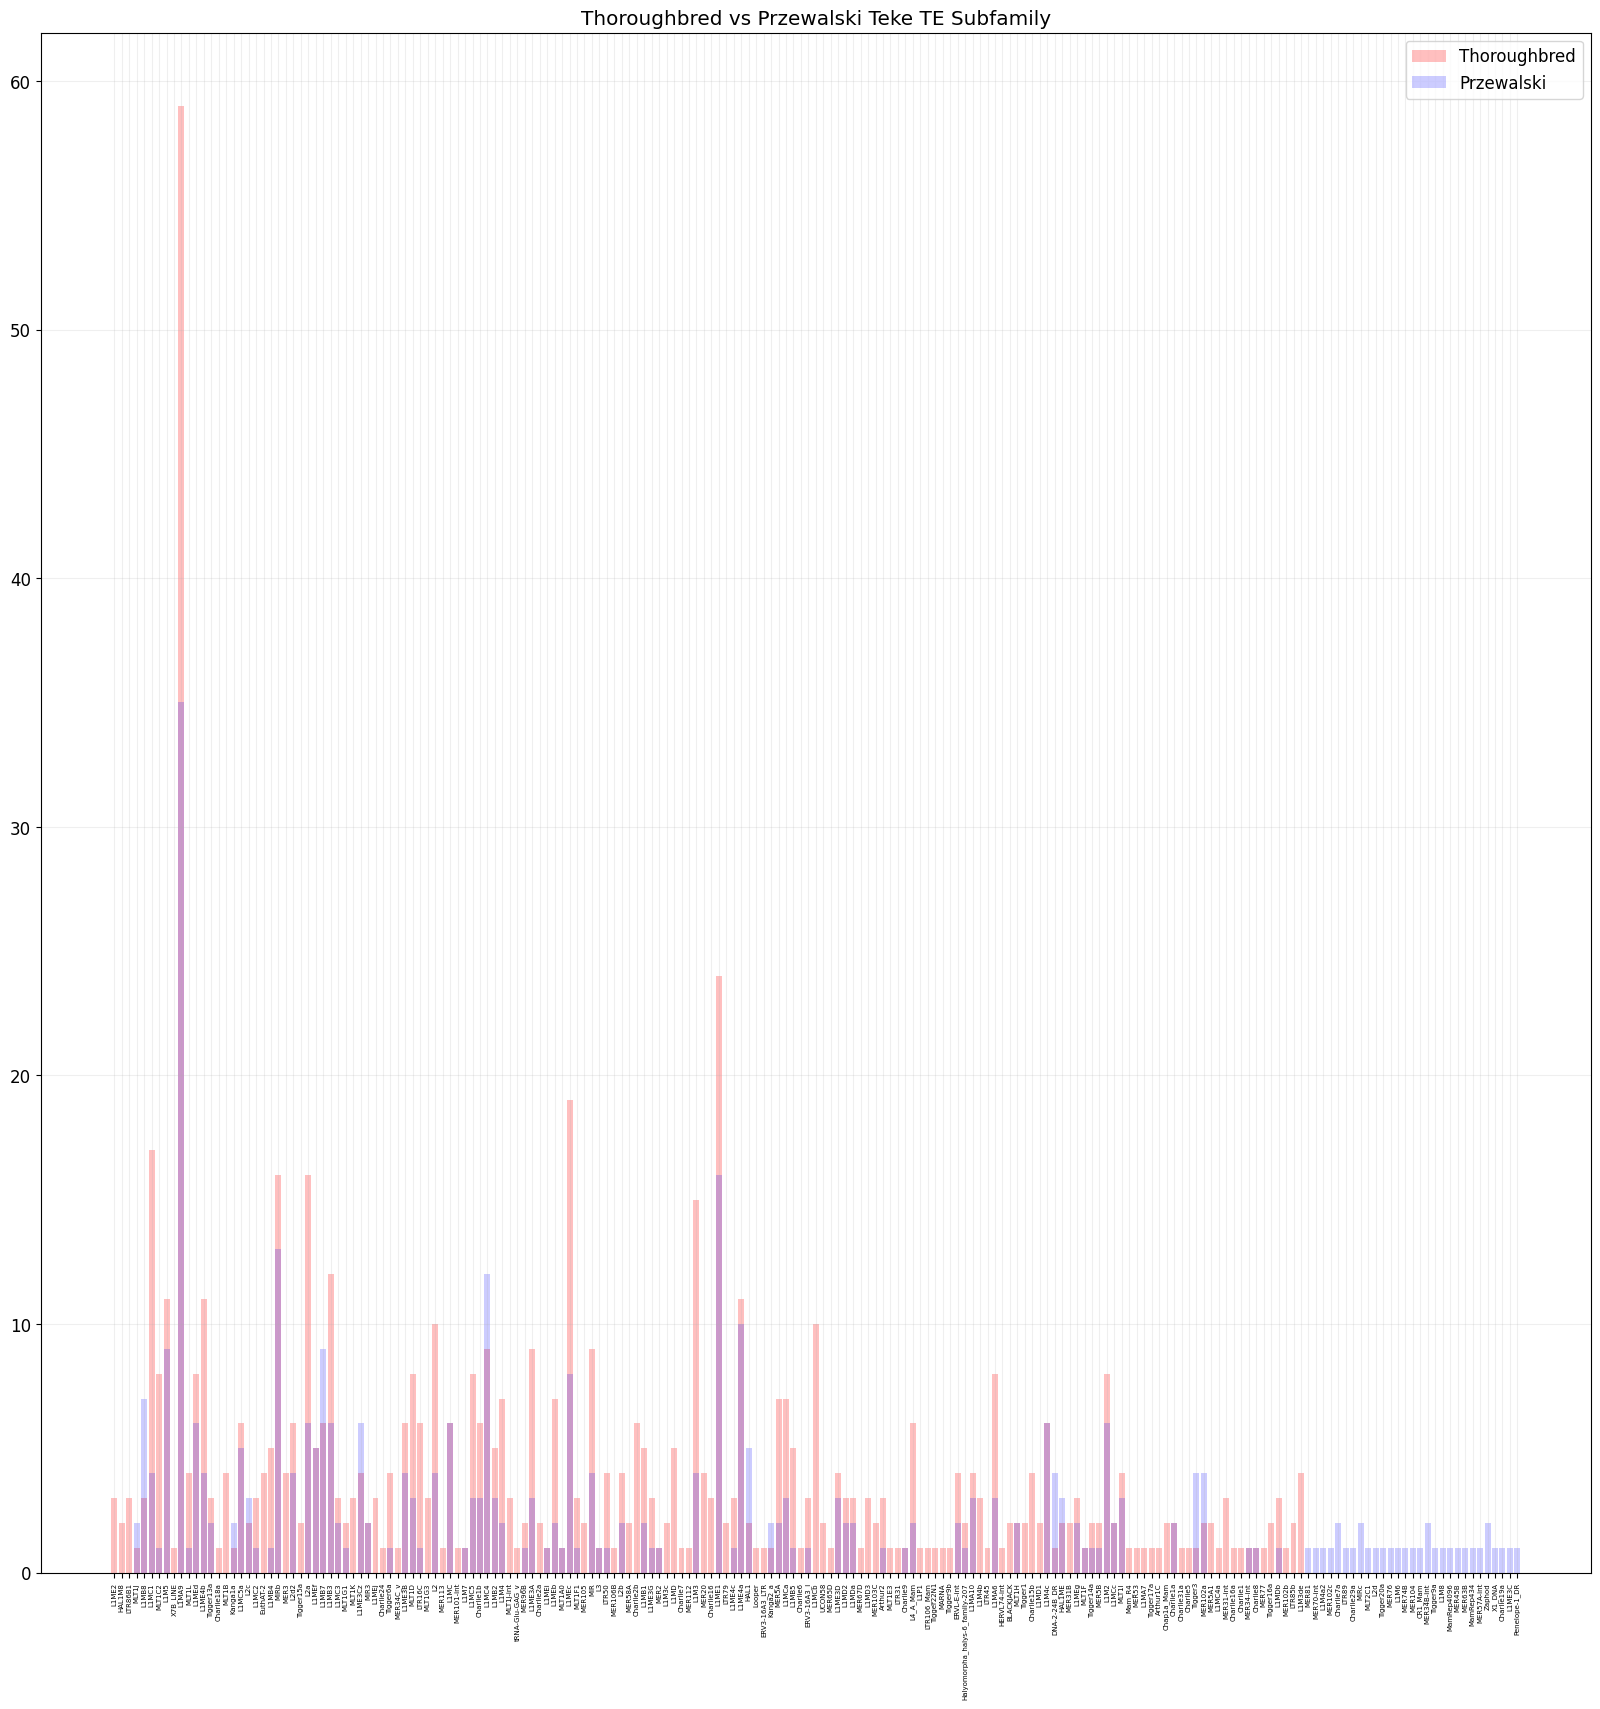

In [194]:
from matplotlib.pyplot import figure



fig = plt.figure()
figure(figsize=(20,20), dpi=100)
#plt.plot(t_counts.keys(), f_counts.values(), marker='.', color='r', alpha = 0.1, label = 'Akhal')
#plt.plot(t_counts.keys(), t_counts.values(),marker='.',color='b', label = 'Arabian')
plt.grid(axis = 'y', alpha = 0.2)
plt.grid(axis = 'x', alpha = 0.2)

plt.bar(t_counts.keys(), f_counts.values(), alpha = 0.25, color='r', label = 'Thoroughbred')
plt.bar(t_counts.keys(), t_counts.values(), alpha = 0.2, color='b', label = 'Przewalski')
plt.xticks(rotation = 90)
plt.legend()
plt.rc('xtick', labelsize=5) 
plt.title("Thoroughbred vs Przewalski Teke TE Subfamily")
plt.savefig('horse/thorVSprz_subfam_bar.pdf')
plt.show()

In [192]:
differences = {f:0 for f in keys}
for i in f_counts.keys():
    differences[i] = np.abs(f_counts[i] - t_counts[i])
fam_diffs = {}
for i in differences.keys():
    x = df_feral.loc[df_feral['subfam'] == i] 
    y =  df_thor.loc[df_feral['subfam'] == i] 
    if i != 'hAT-N21_DR':
        try: fam = x['fam'].tolist()[0]
        except: continue
        if fam in fam_diffs.keys():
            fam_diffs[fam] += differences[i]
        else:
            fam_diffs[fam] = differences[i]


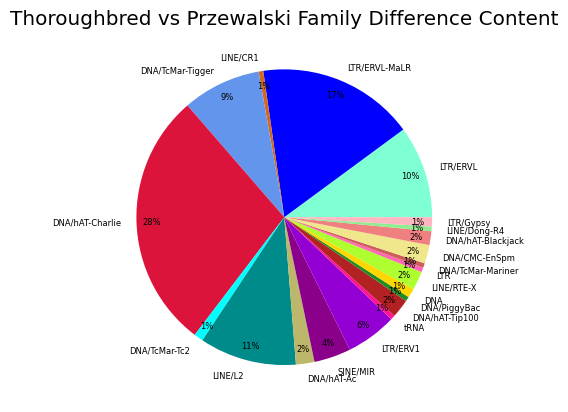

In [196]:
import matplotlib.colors as mcolors
colors = mcolors.CSS4_COLORS
#del colors['black']
#del colors['white']
delete_colors = ['black','snow','white','dimgray','grey','gray','lightgray','antiquewhite','cornsilk', \
                 'coral', 'blanchedalmond','darkblue','burlywood', 'cadetblue', 'darkgray', 'darkgoldenrod', \
                 'darkgrey', 'lemonchiffon', 'darkseagreen', 'darkslategrey', 'dimgrey', 'lightslategray', \
                'lightslategrey', 'lightgoldenrodyellow' , 'beige', 'darkorchid', 'floralwhite', 'bisque', \
                'deepskyblue', 'dodgerblue', 'ivory', 'brown', 'indigo', 'chartreuse', 'darkolivegreen', \
                'ghostwhite', 'green','lightgrey', 'darksalmon', 'lawngreen', 'lavender', 'aliceblue', \
                'lightskyblue', 'fuchsia', 'lightcyan' , 'honeydew', 'darkred', 'lightblue', 'lavenderblush',\
                'mediumpurple', 'darkorange', 'darkslateblue','darkslategray','blueviolet','aqua' , \
                'darkturquoise','darkgreen','azure', 'gainsboro','goldenrod']
for c in delete_colors:
    if c in colors.keys():
        del colors[c]
#del colors['whites']
cols = list(colors.keys())

data = pd.DataFrame(fam_diffs.items(),columns=['fam', 'count'])
data = data[data["fam"].str.contains("L1") == False]

#labels = set(list(t1.keys()) + list(t.keys()))
#print(len(labels))
#print(labels)
#shared_labels = set.intersection(set(t.keys()), set(t1.keys()), set(t2.keys()), \
#                                 set(t3.keys()),set(t4.keys()), set(t5.keys())) 
shared_labels = data['fam'].tolist()

colours = dict(zip(shared_labels, cols[:len(shared_labels)]))




plt.pie(data['count'], labels=data['fam'], autopct='%.0f%%', textprops={'fontsize': 6},  pctdistance=.9,\
       colors=[colours[v] if v in colours else 'black' for v in shared_labels])
#plt.rcParams['font.size'] = 12
plt.title('Thoroughbred vs Przewalski Family Difference Content')
plt.savefig('horse/thorVSprzew_subfam_pie.pdf')
plt.show()

#plt.pie(fam_diffs.values(), labels=fam_diffs.keys(), counterclock=True)
#plt.show()